In [4]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pathlib
import random
import sys
sys.path.insert(0, "./../")

from src.utils import load_data, prep_data, predict_and_plot_SLC
from pathos.multiprocessing import ProcessingPool as Pool

import seaborn as sns
sns.set()

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('colorblind')
mpl.rcParams['font.family'] = 'Arial'

In [5]:
# Load data
data = load_data([0,151], datasets_folder="./../assets/v2_ice_sheet_simulation/", extension="_dt", version="vs")
sample_size = 3000 # TEST SIZE, if you want real plots s=3000

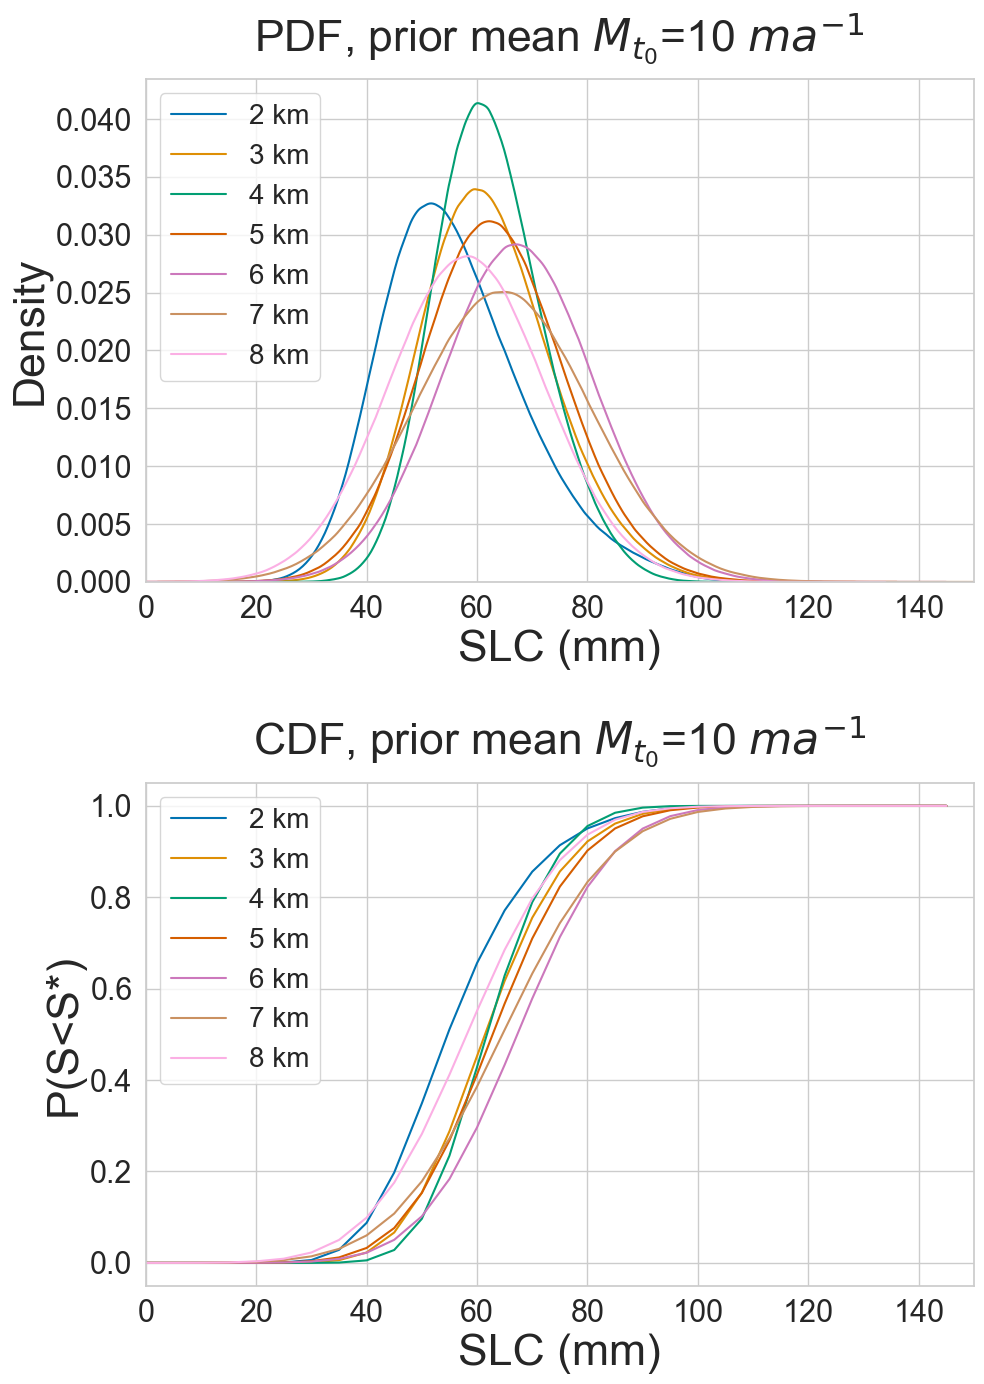

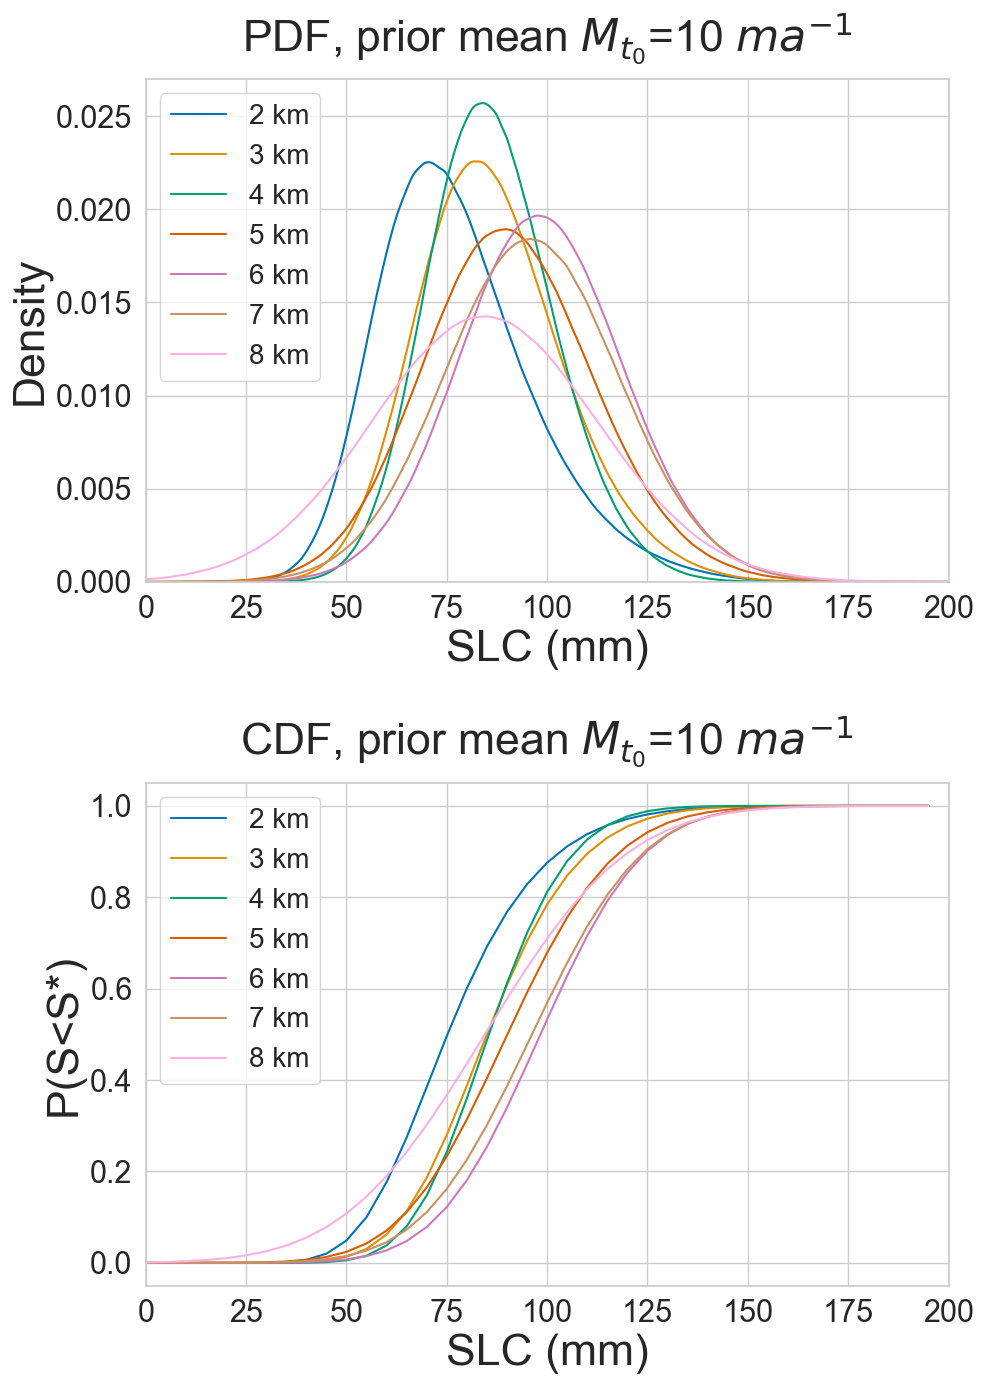

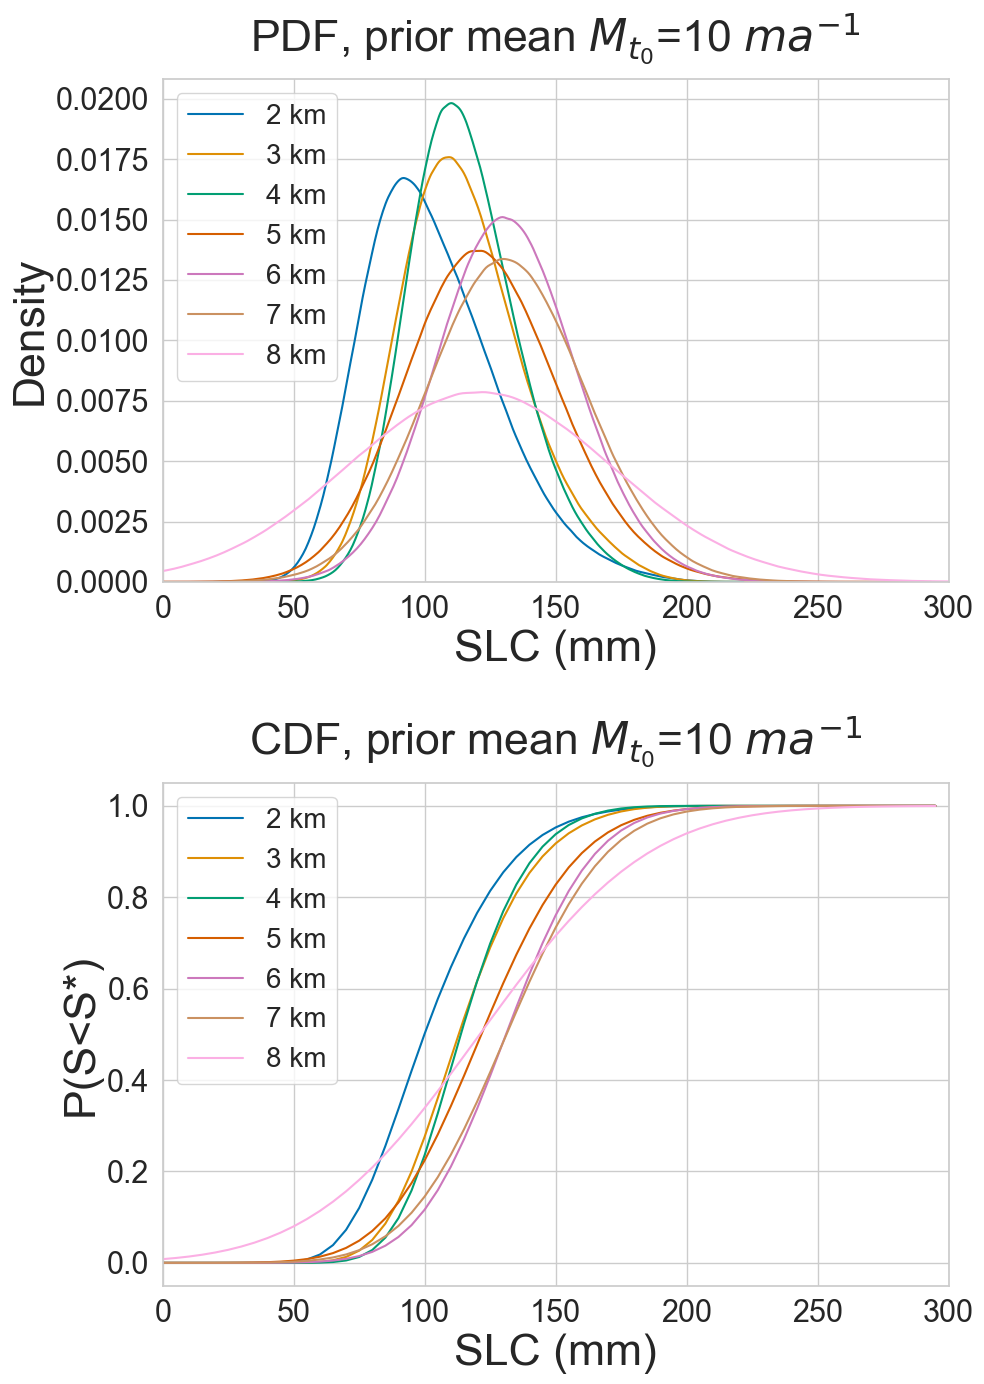

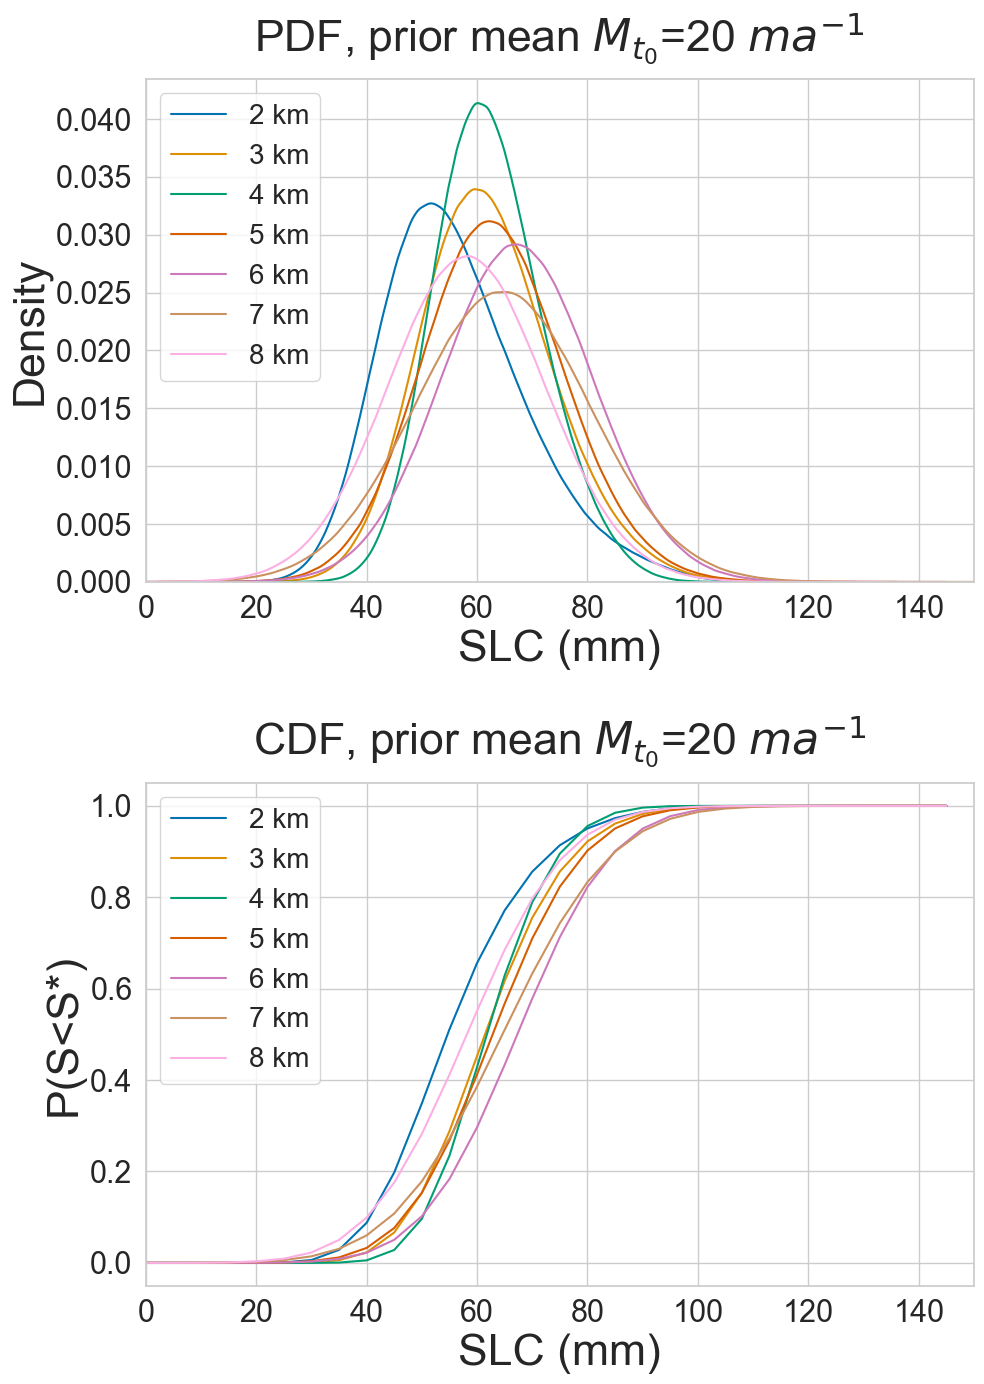

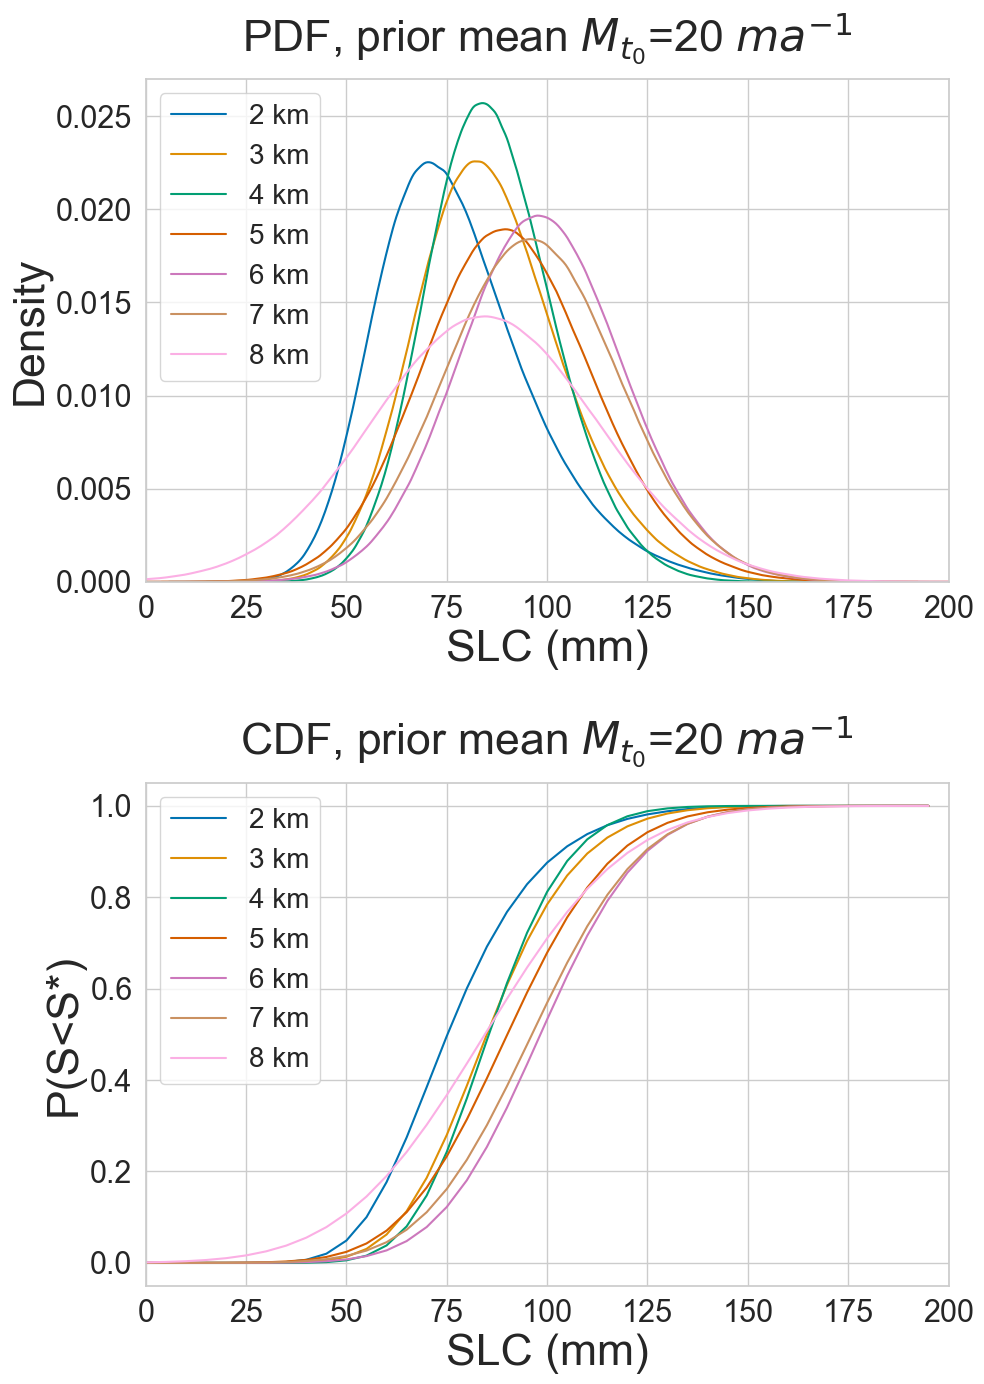

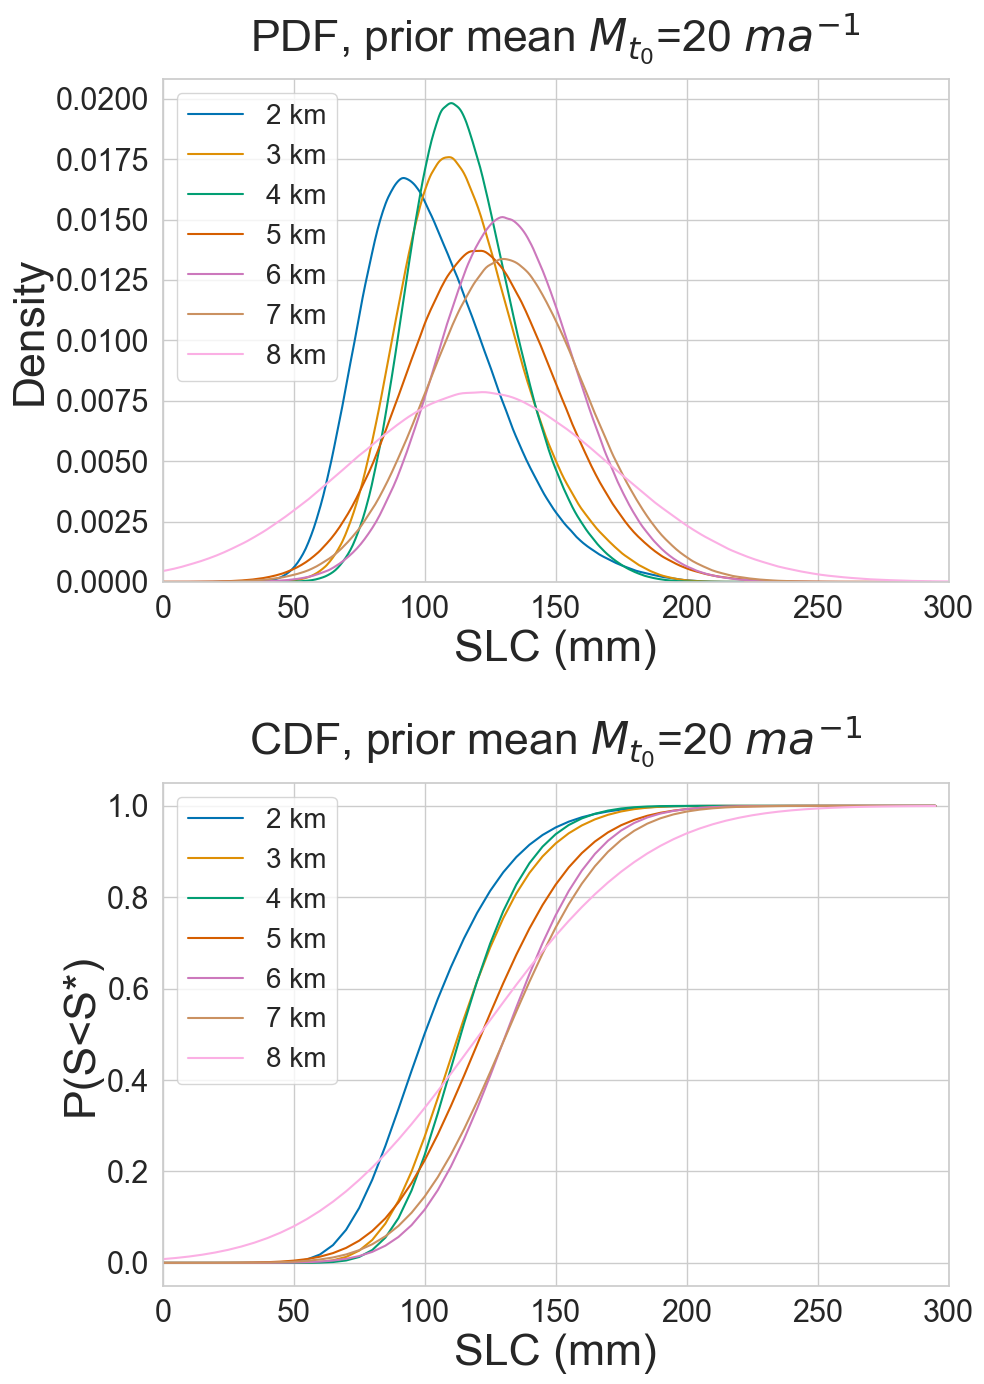

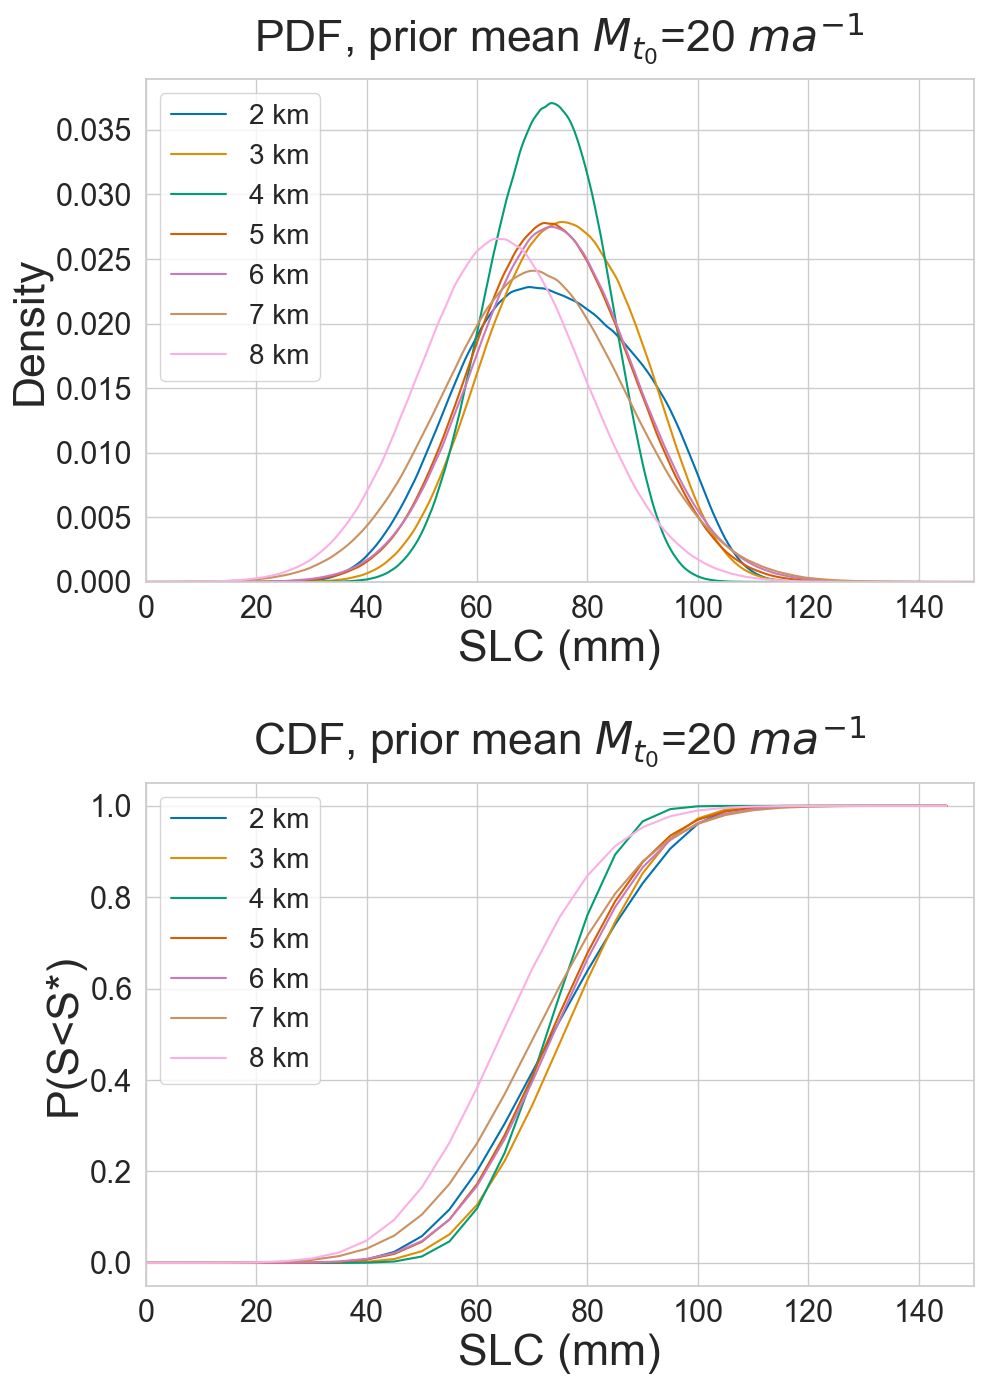

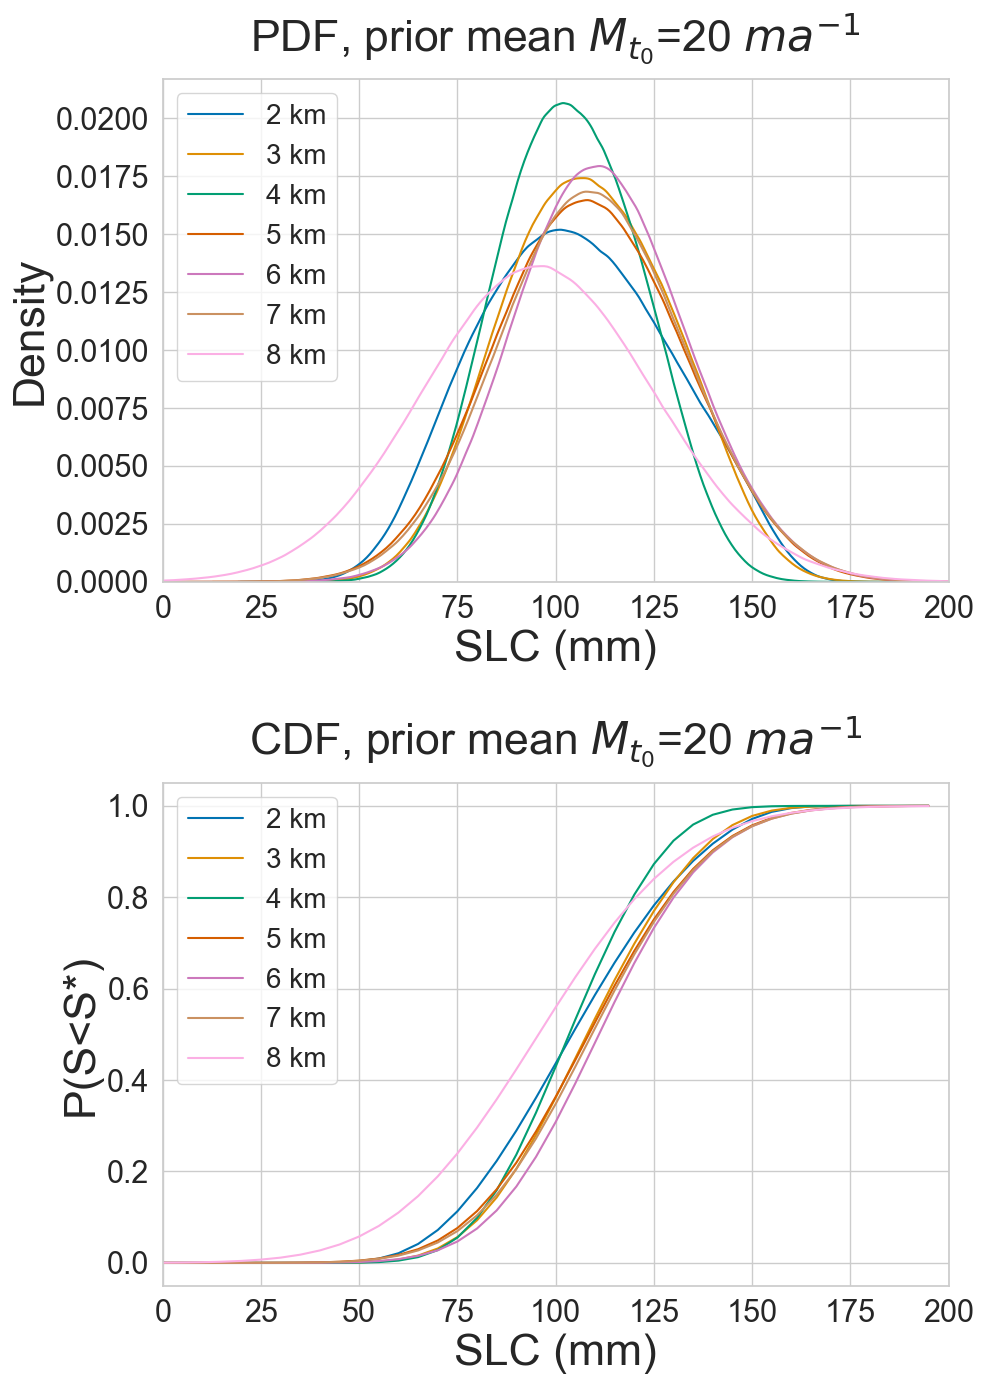

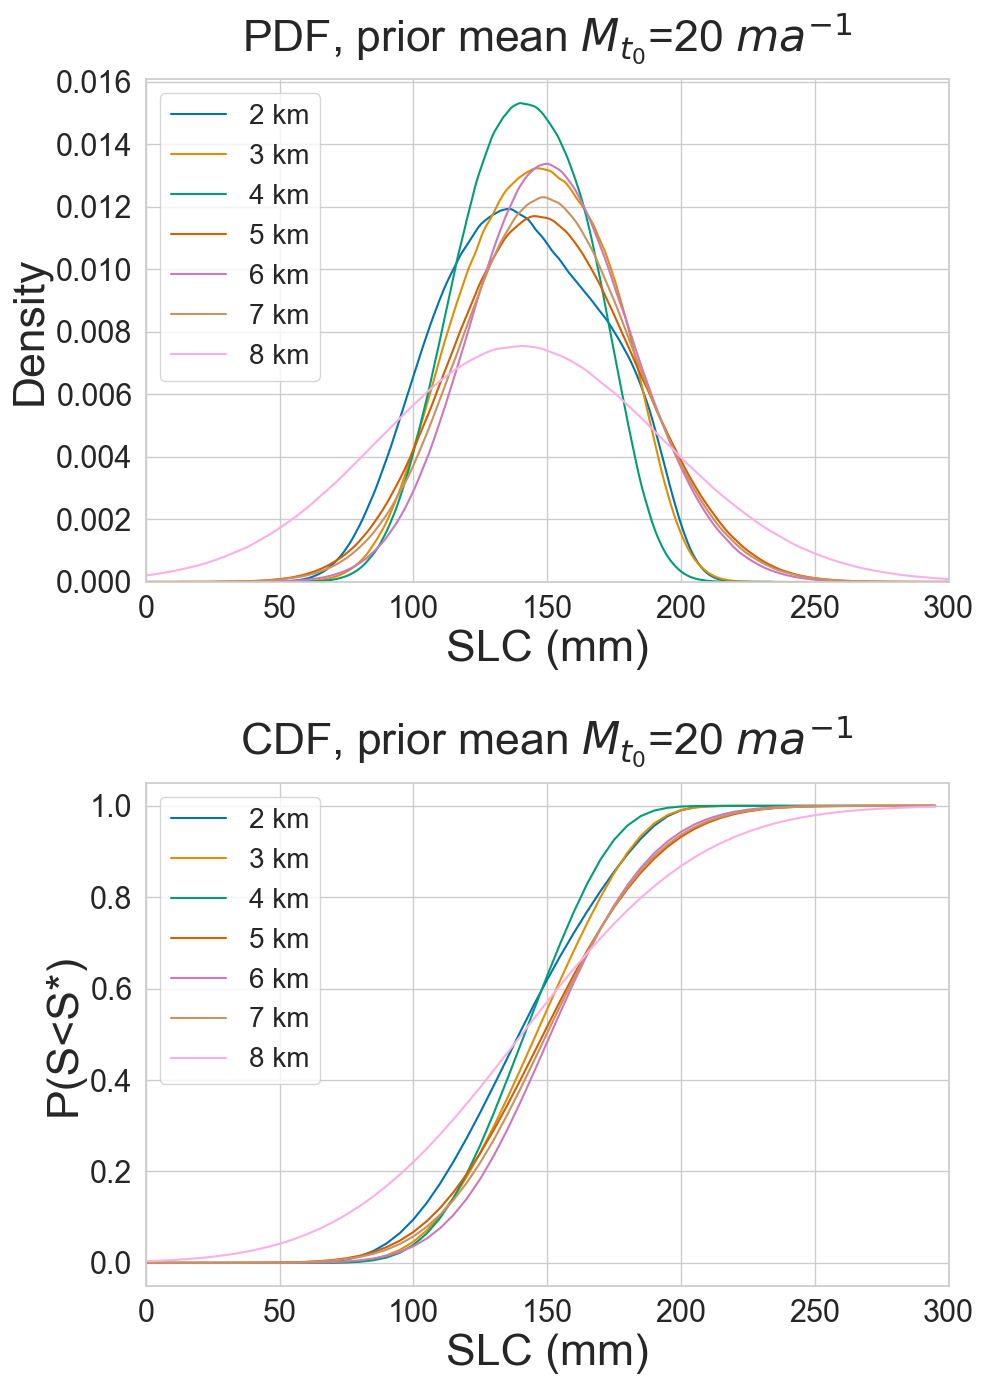

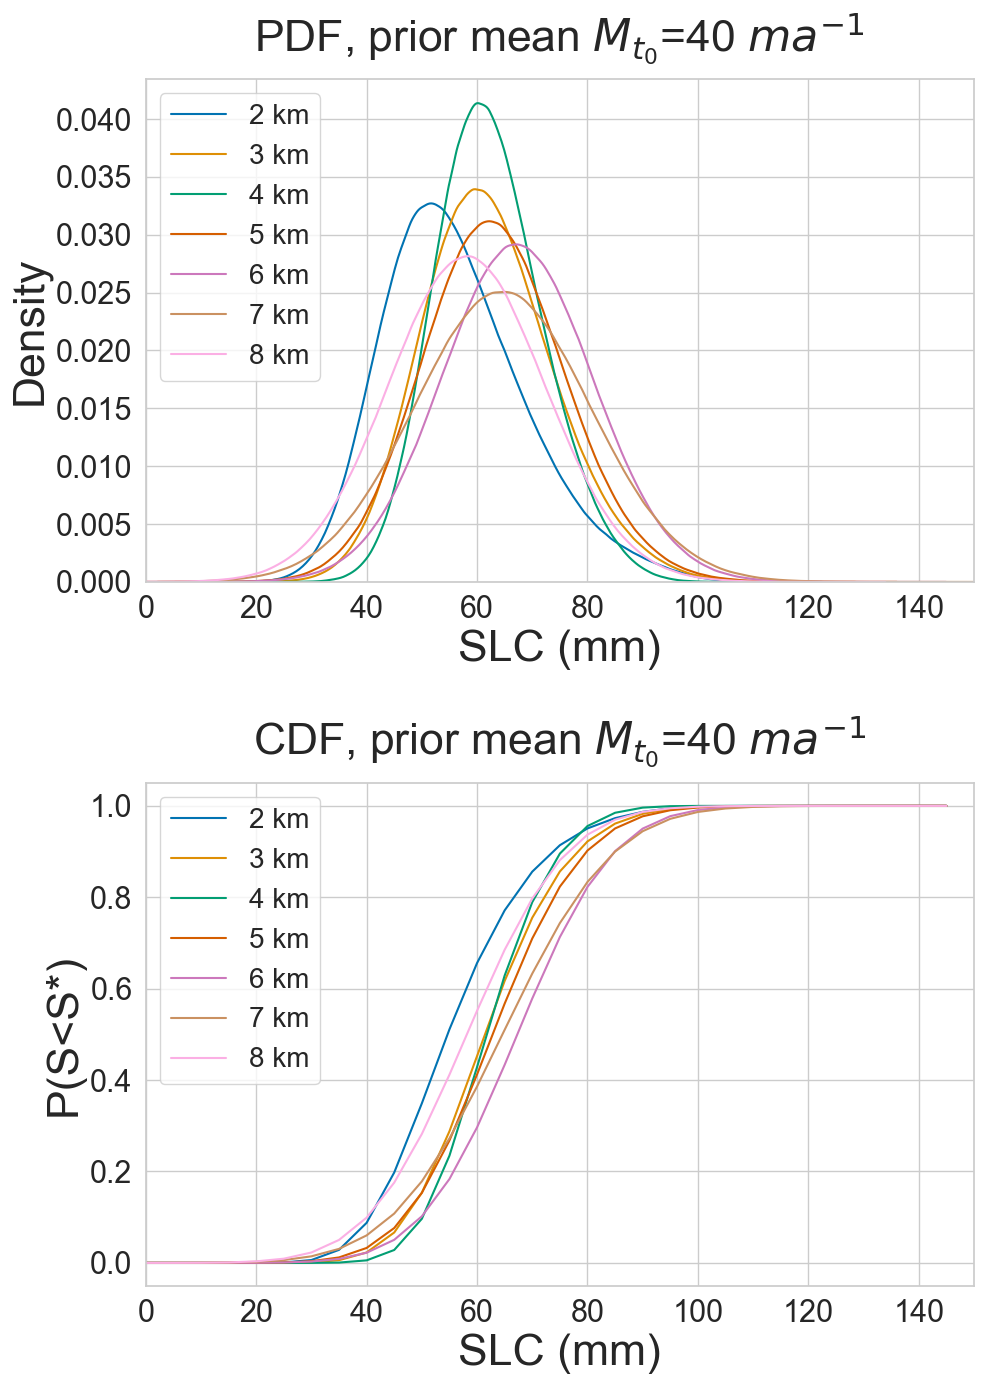

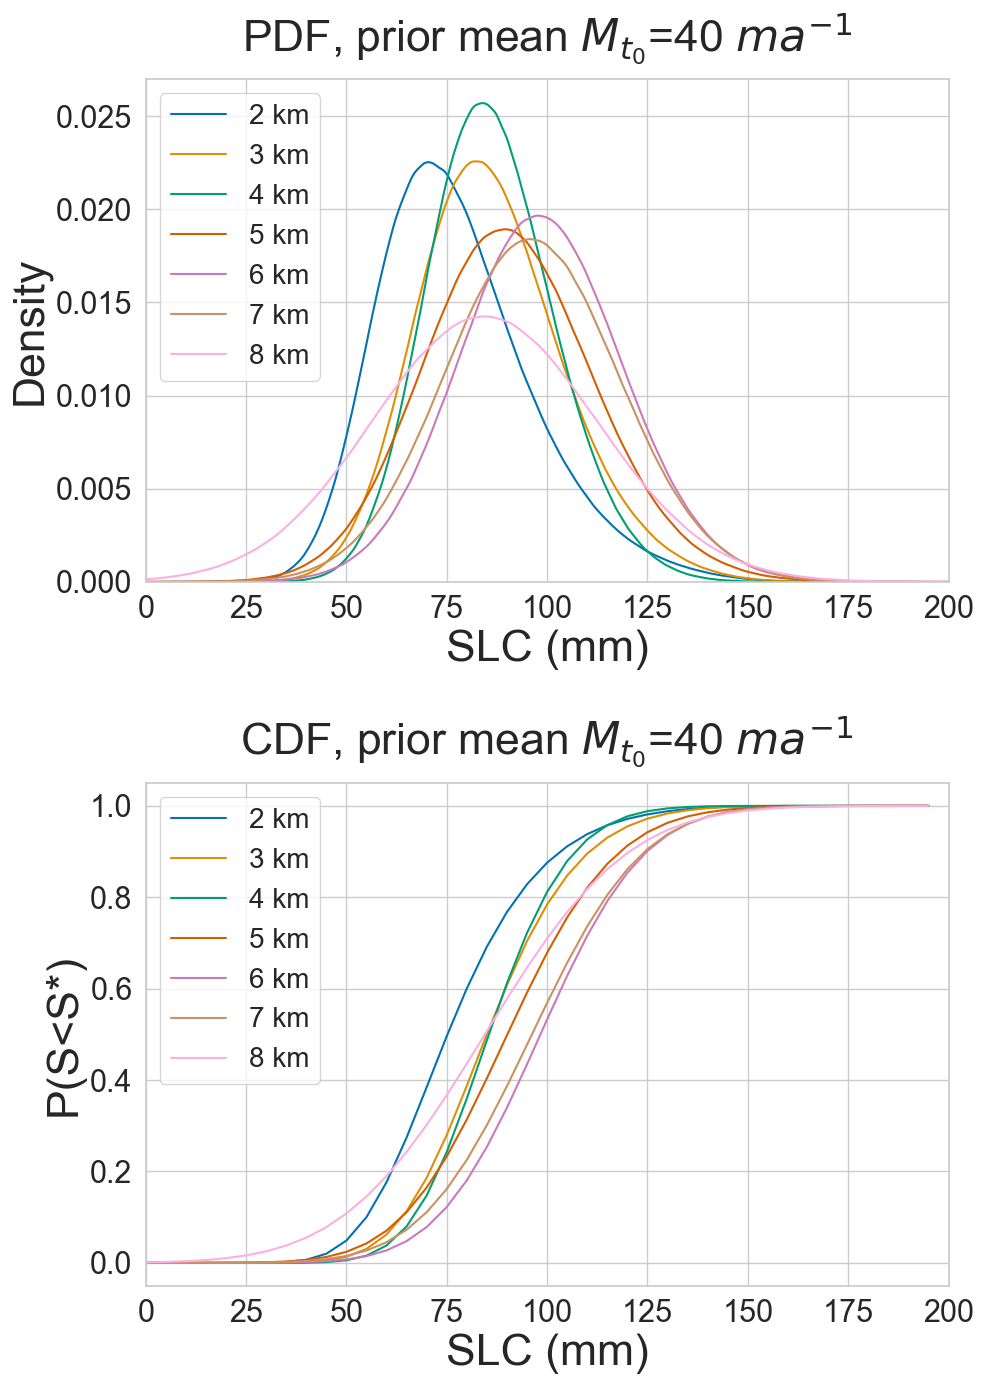

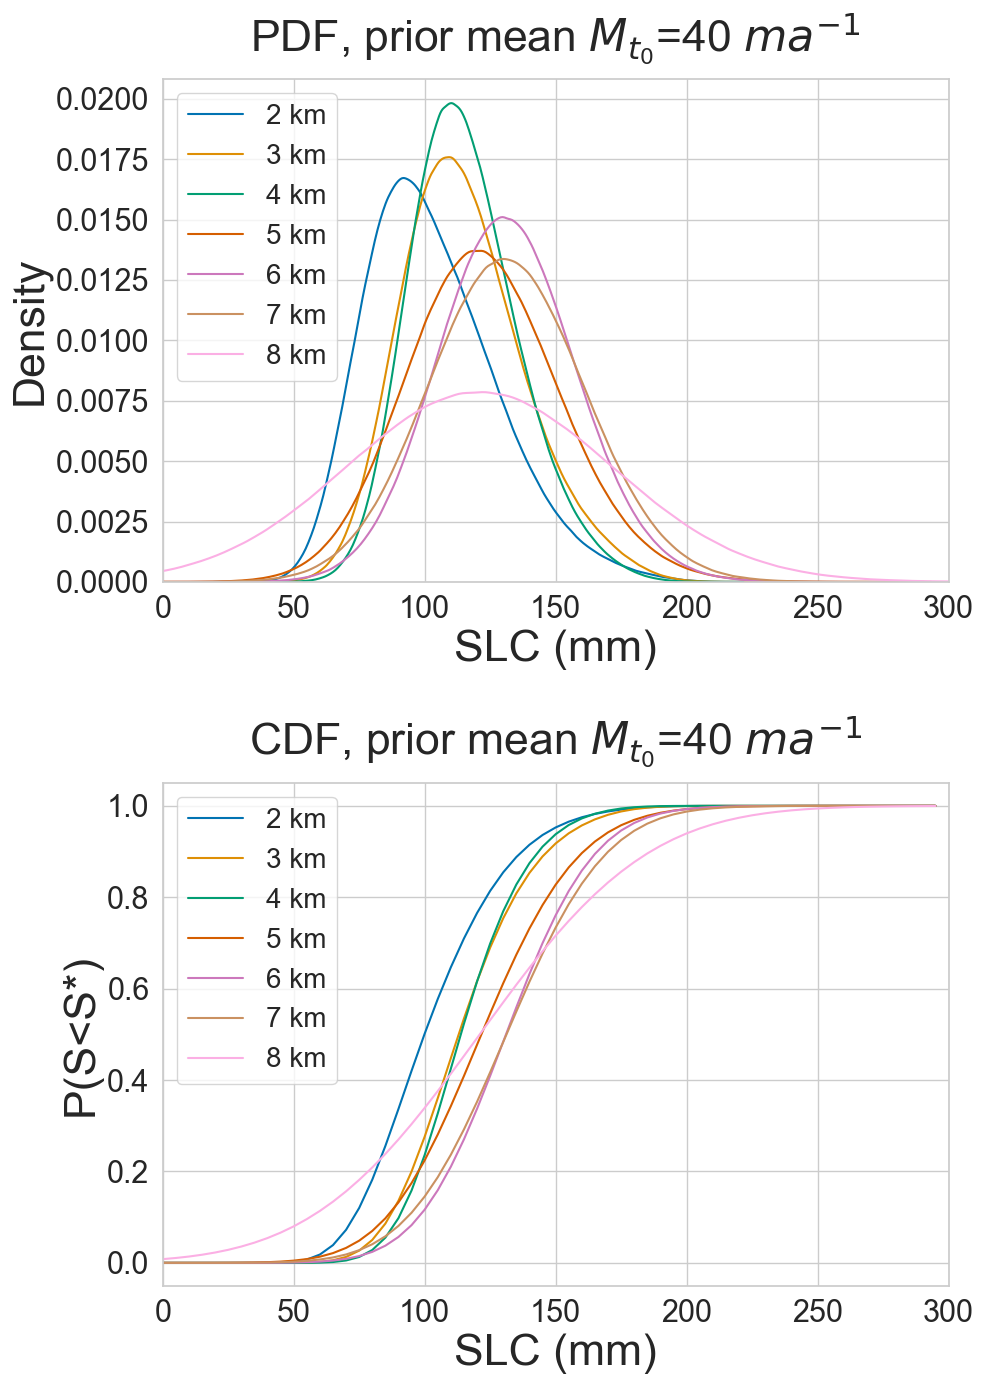

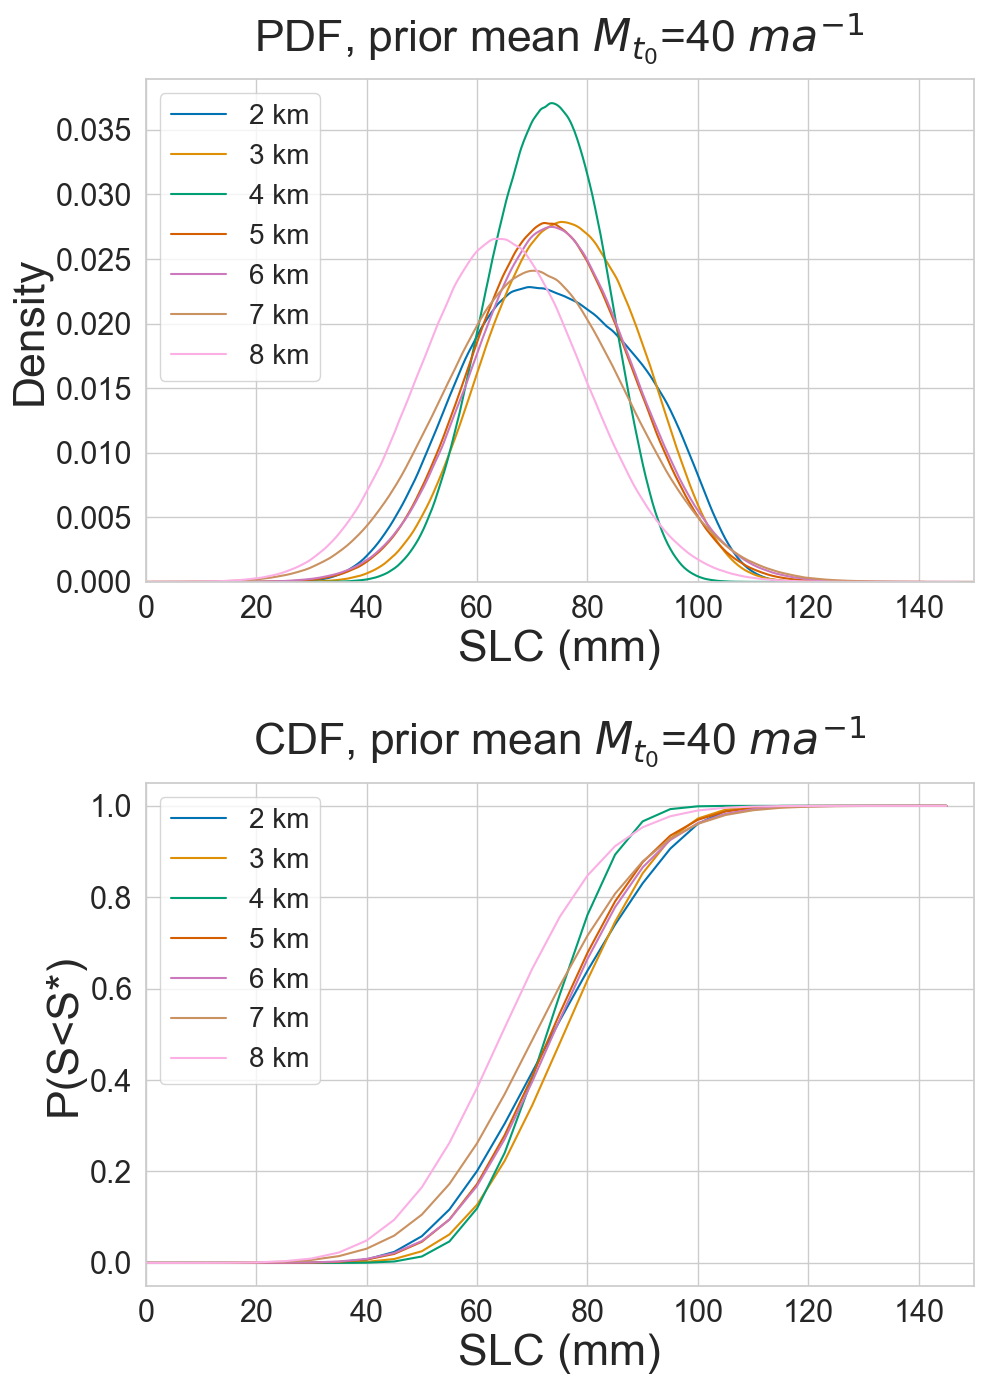

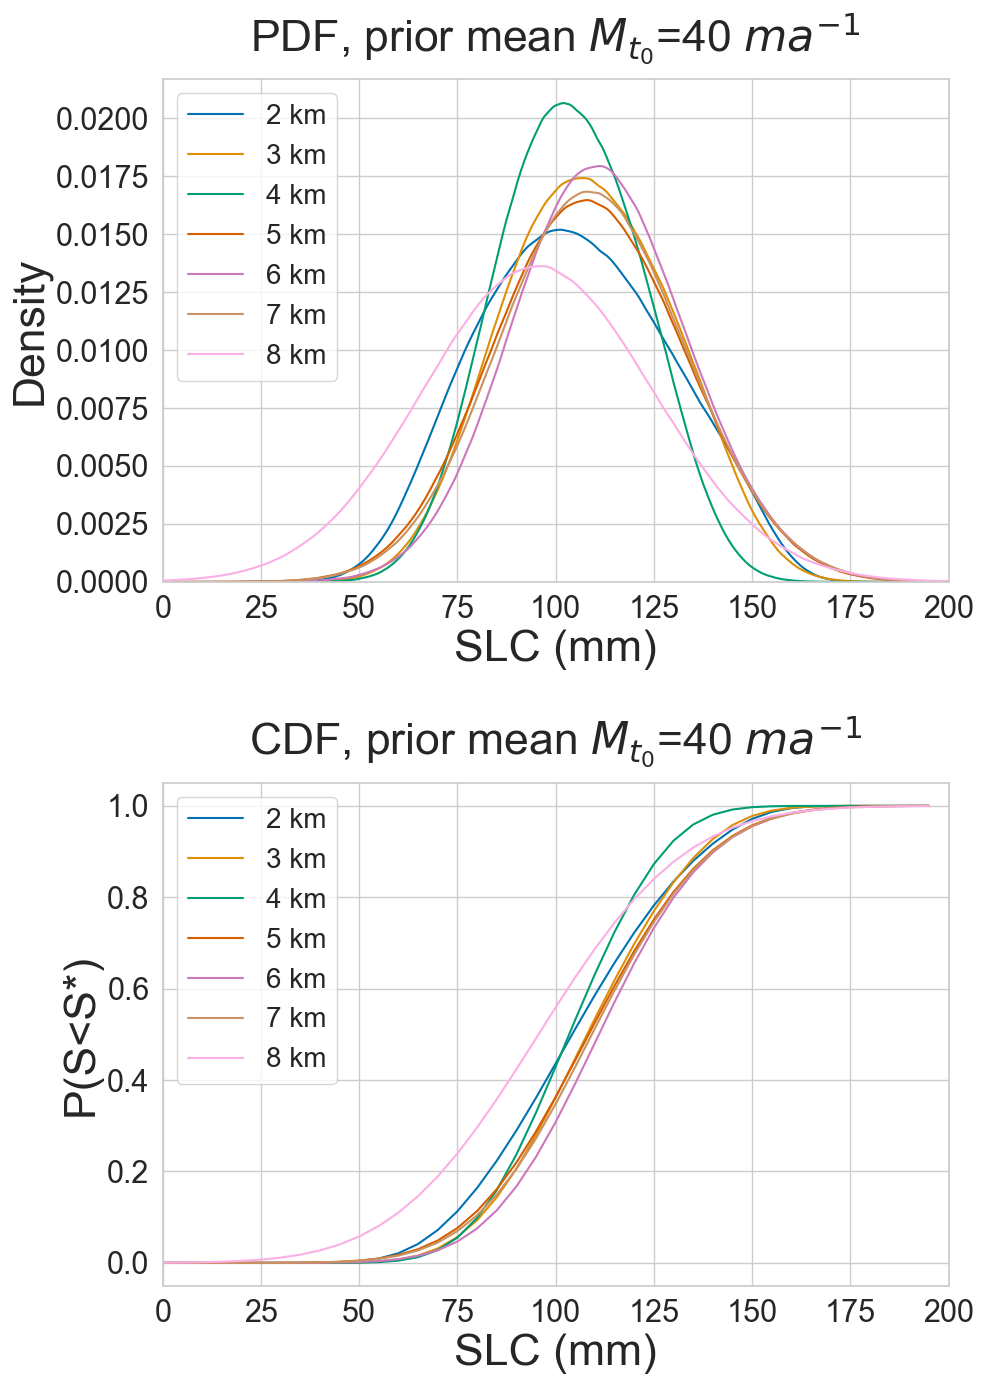

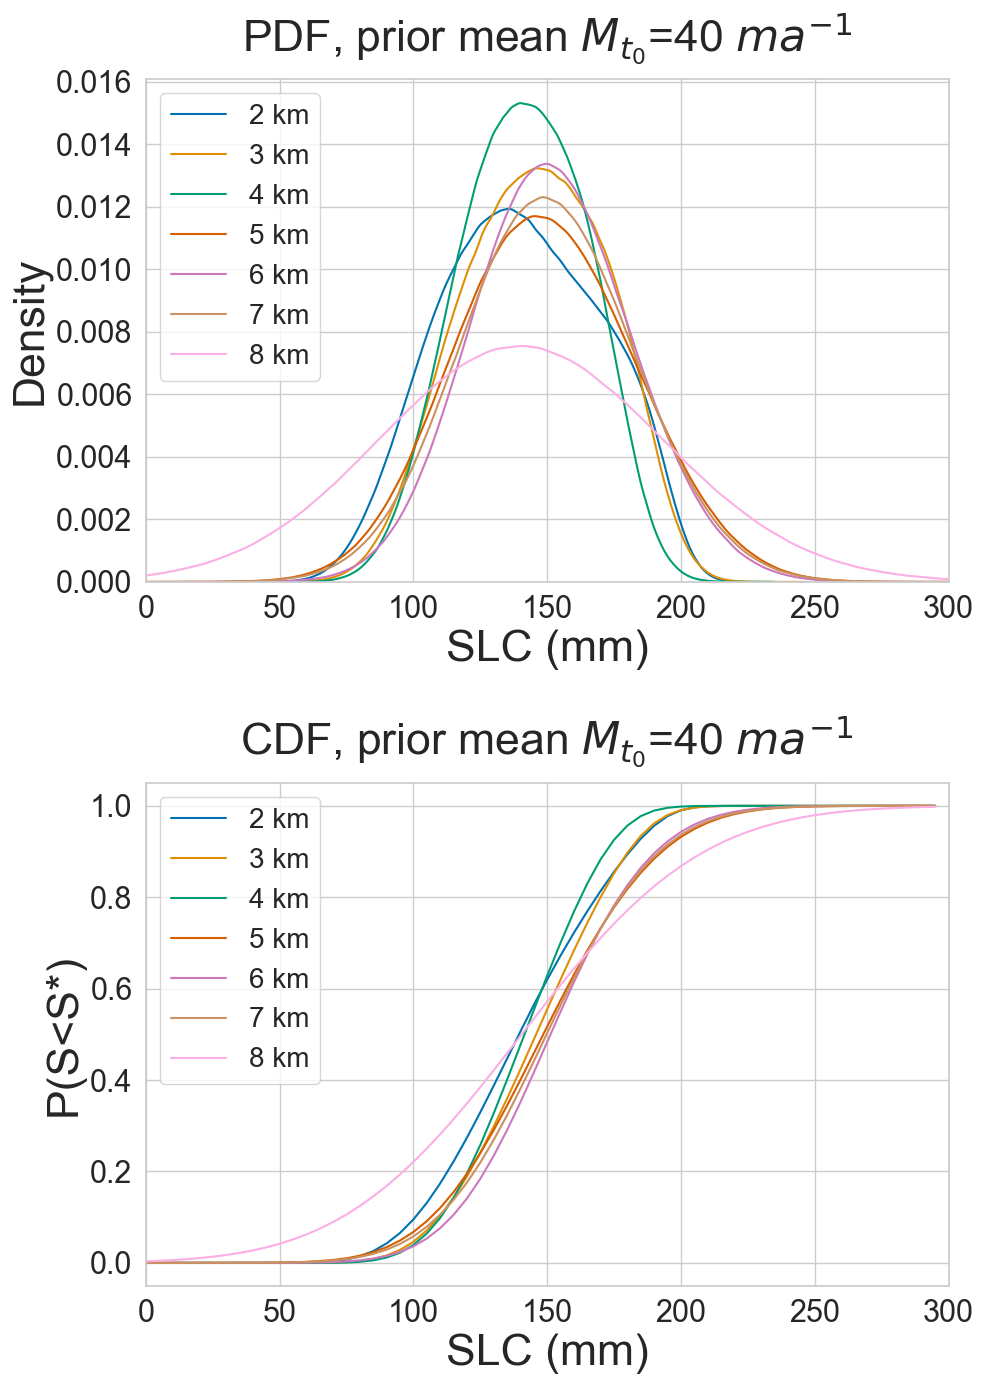

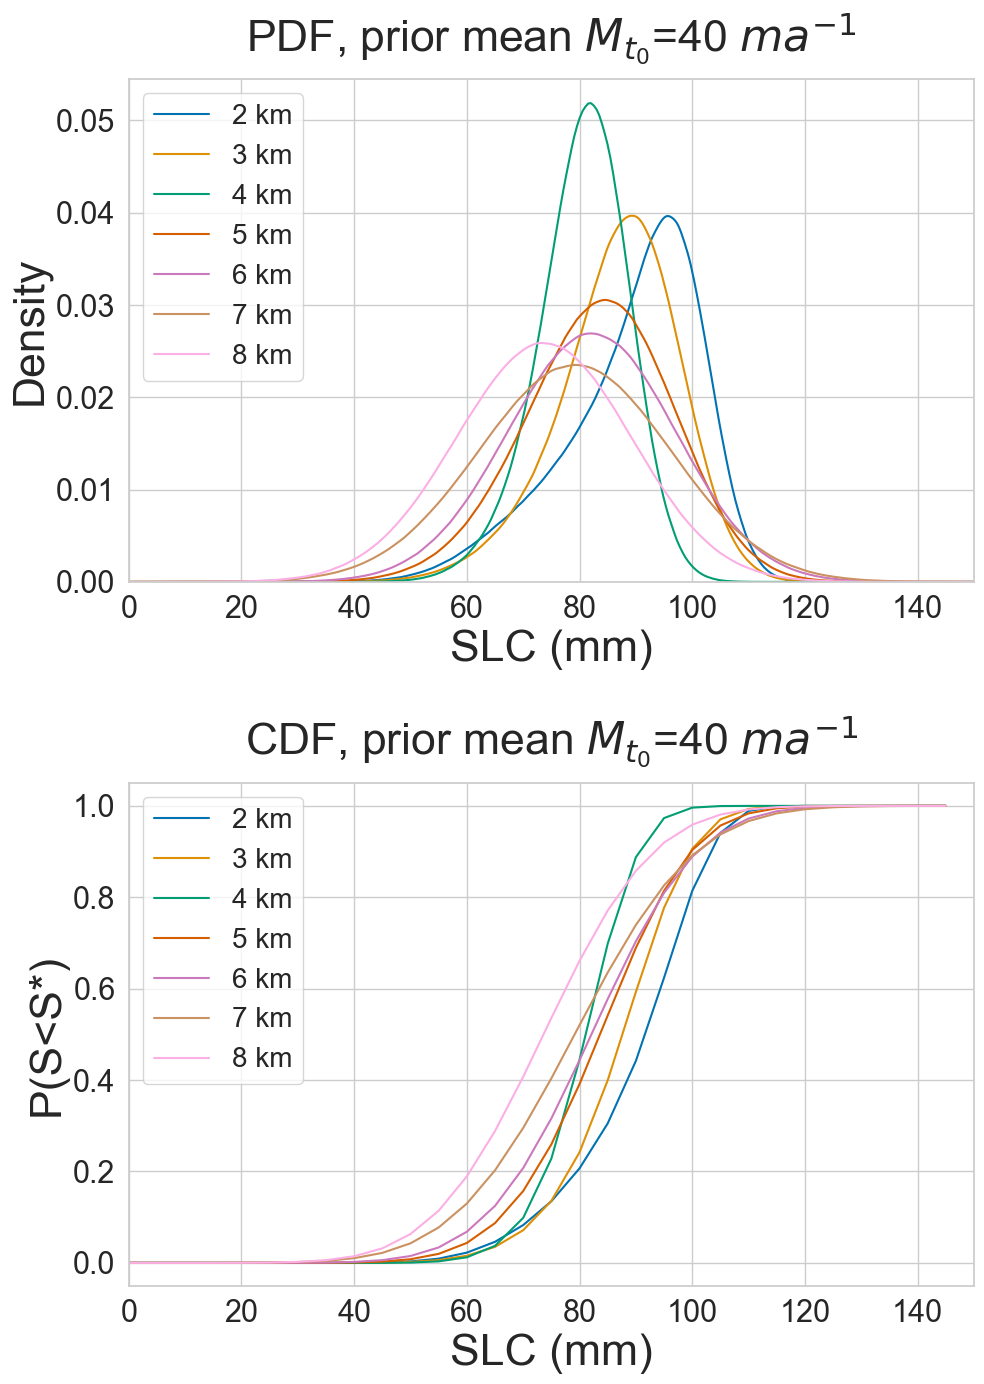

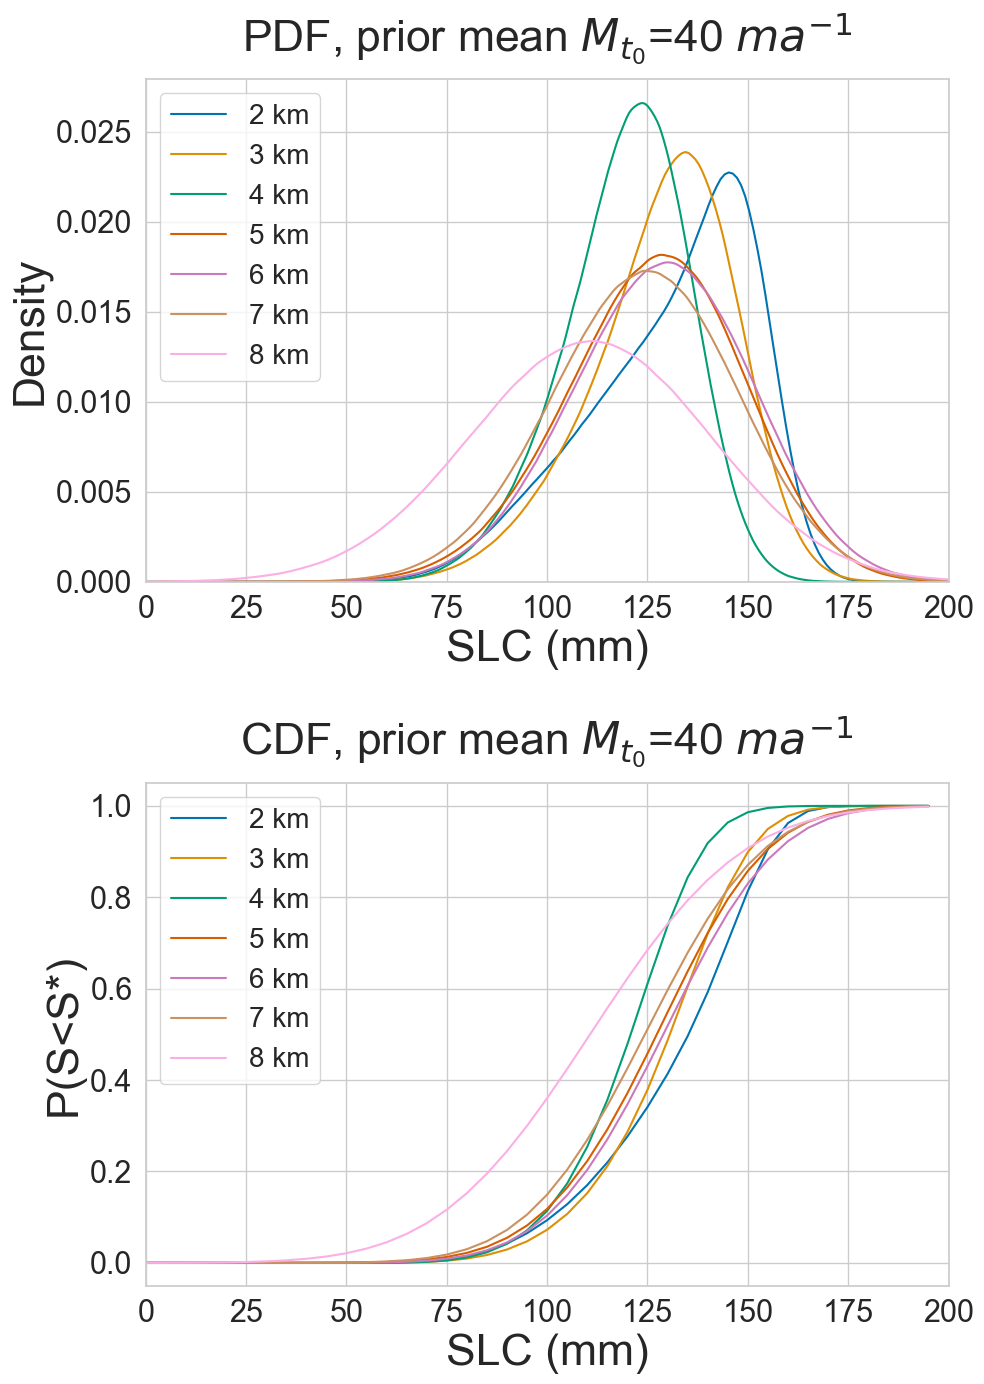

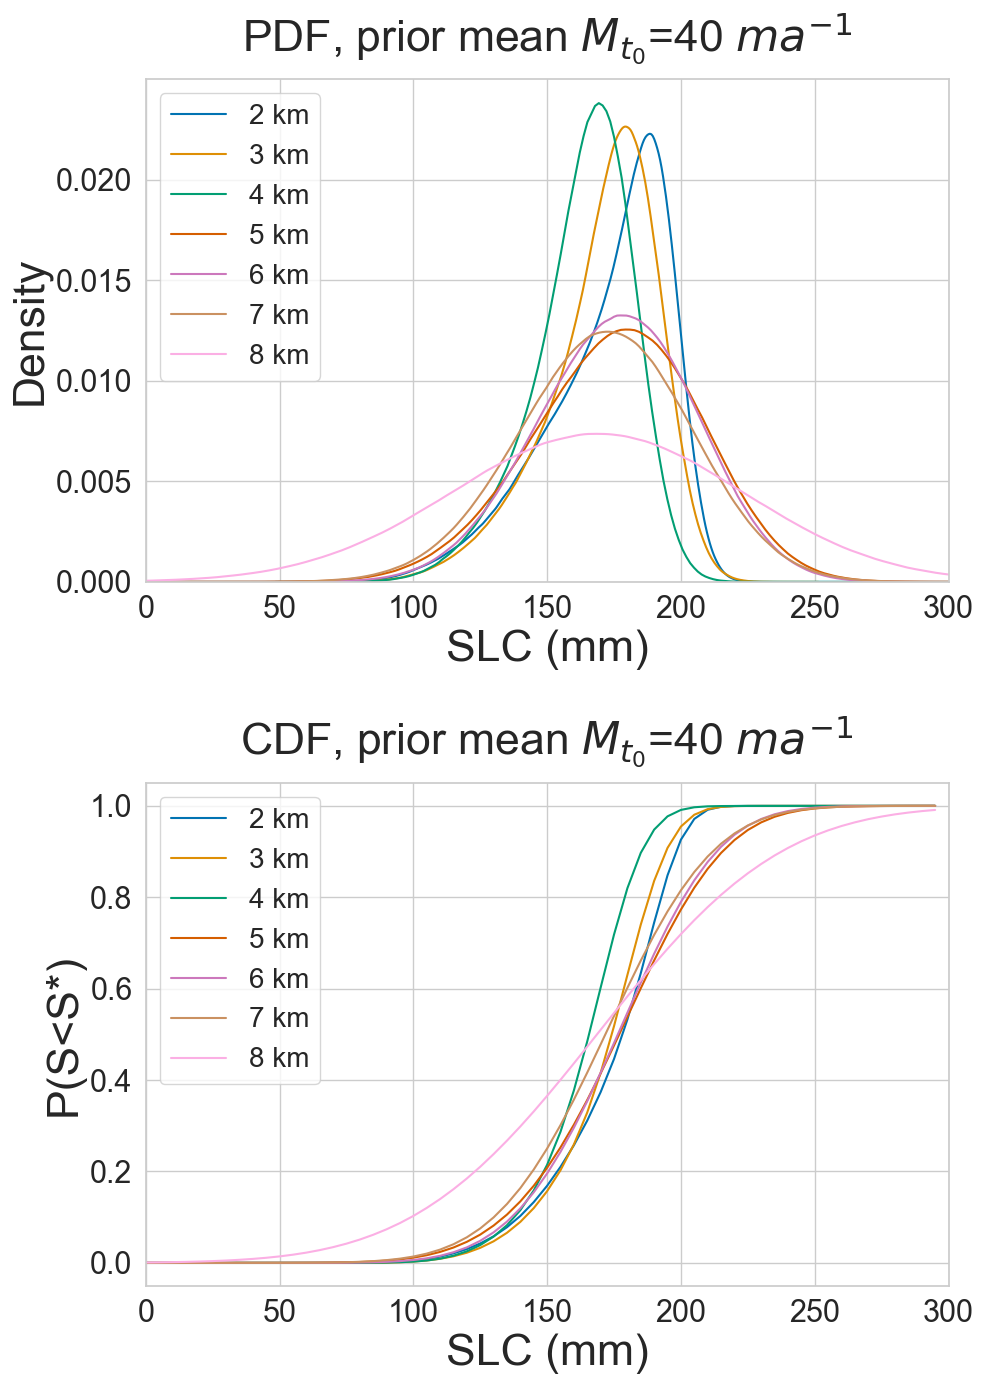

In [6]:
# Figure 4: this can take > 10 minute to run
timestamp_list = [100,125,150]
max_val_list= [150,200,300,400]
all_data = []
means = [(2.2,10),(2.872,20),(3.52,40)] #(3.285,30),
for idx_mean, (mean_prior, mean_label) in enumerate(means):
    # Run the stuff and store the data
    for timestamp, max_val_un in zip(timestamp_list, max_val_list):
        predictions = [predict_and_plot_SLC(data, timestamp, max_val_un, i, plot=False, sample_size=sample_size, mean_prior=mean_prior) for i in range(2,9)]
        data_for_plot = []
        for r, prediction in zip(range(2,9), predictions):
            mean, var = prediction[1]
            data_list = []
            for m, v in zip(mean, var):
                data_list += list(np.random.normal(m, np.sqrt(v), size=sample_size))
            x = []
            y = []
            for thres in range(0, max_val_un, 5):
                x.append(thres)
                y.append(len([i for i in data_list if i > thres]) / len(data_list))
            data_for_plot.append((r, data_list, x, y))
        all_data.append((timestamp, max_val_un, data_for_plot))

    # Plot in a different loop
    for timestamp, max_val_un, data_for_plot in all_data:
        plt.figure(figsize=(10,14))

        plt.subplot(2,1,1)
        for r, data_list, x, y in data_for_plot:
            sns.kdeplot(np.array(data_list), label=str(r) + " km", gridsize=400)

        plt.subplot(2,1,2)
        for r, data_list, x, y in data_for_plot:
            plt.plot(x, [1 - i for i in y], label=str(r) + " km")

        ticksize = 22
        label = 32
        legend = 20

        plt.subplot(2,1,1)
        plt.xlim(0, max_val_un)
        plt.xlabel("SLC (mm)", fontsize=label)
        plt.ylabel("Density", fontsize=label)
        plt.xticks(fontsize=ticksize)
        plt.yticks(fontsize=ticksize)
        plt.title(f"PDF, prior mean "+r'$M_{t_0}$'+f"={mean_label} " + r'$ma^{-1}$', fontsize=label, pad=20)
        #if idx_mean >= 2:
        plt.legend(fontsize=legend, loc='upper left')

        plt.subplot(2,1,2)
        plt.xlim(0, max_val_un)
        plt.xlabel("SLC (mm)", fontsize=label)
        plt.ylabel("P(S<S*)", fontsize=label)
        plt.xticks(fontsize=ticksize)
        plt.yticks(fontsize=ticksize)
        #if idx_mean >= 2:
        plt.legend(fontsize=legend, loc='upper left')
        plt.title(f"CDF, prior mean "+r'$M_{t_0}$'+f"={mean_label} " + r'$ma^{-1}$', fontsize=label, pad=20)

        plt.tight_layout()
        plt.subplots_adjust(hspace=0.4)  # Increase space between subplots
        plt.savefig(f"./../assets/plots/fig_4/cdf_pdf_{timestamp}_mean_{mean_label}.pdf", bbox_inches='tight')


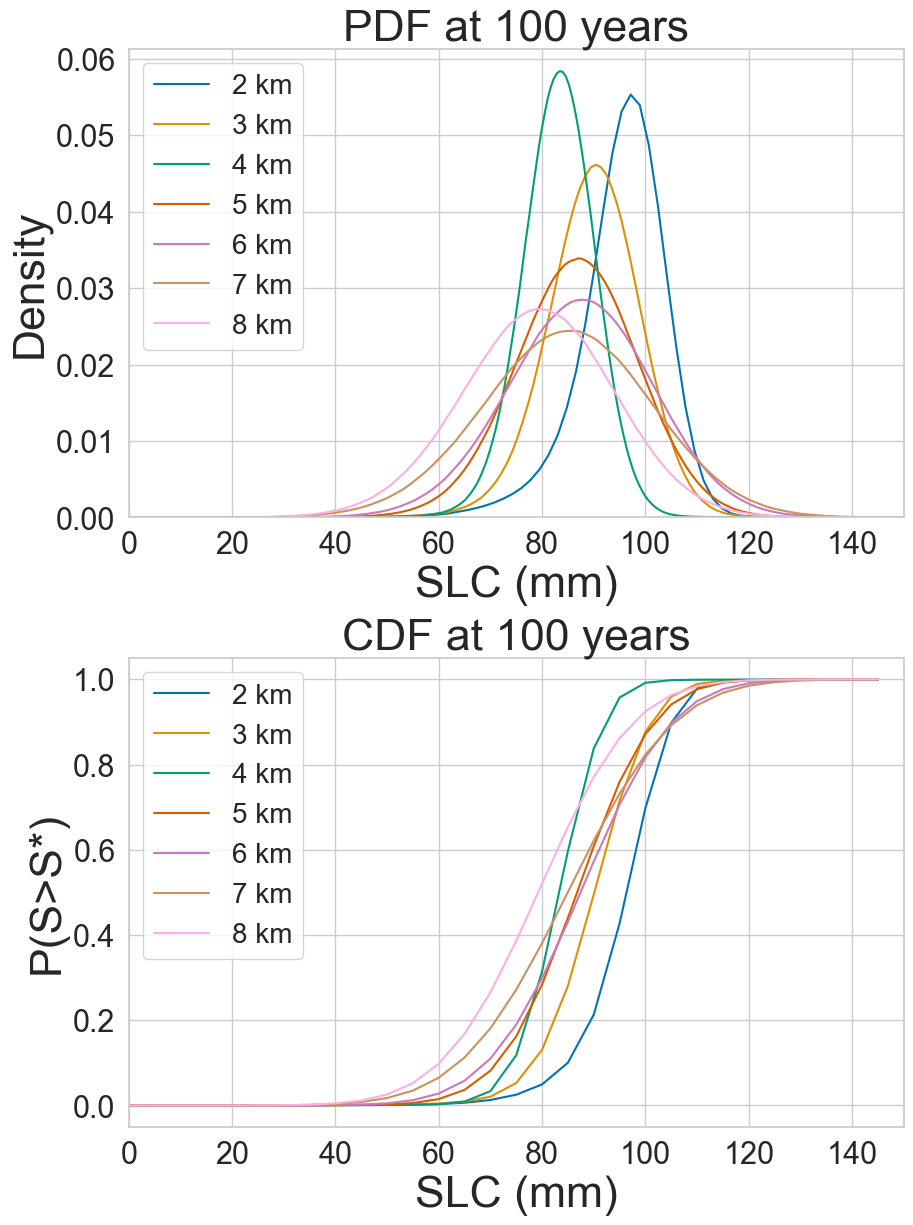

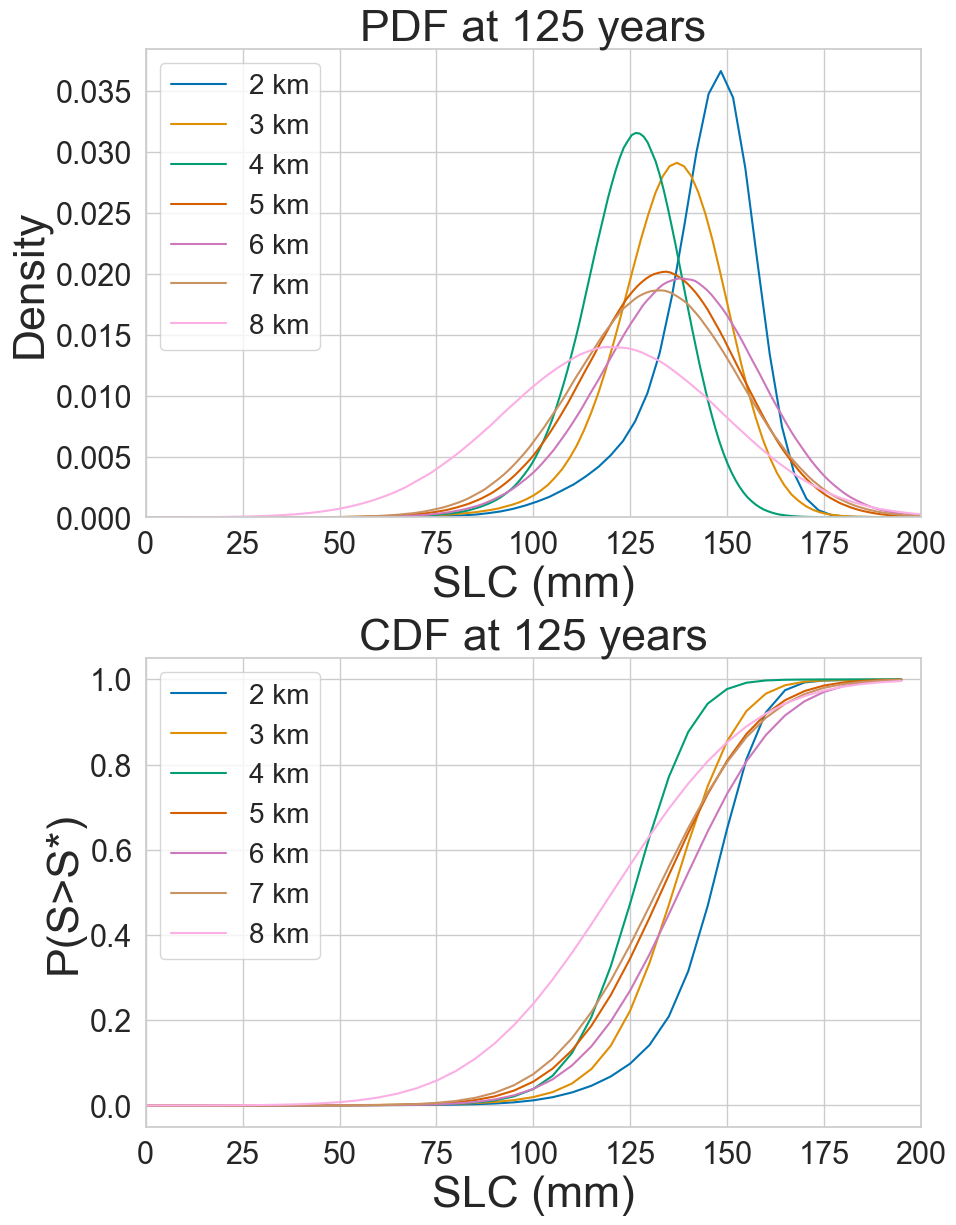

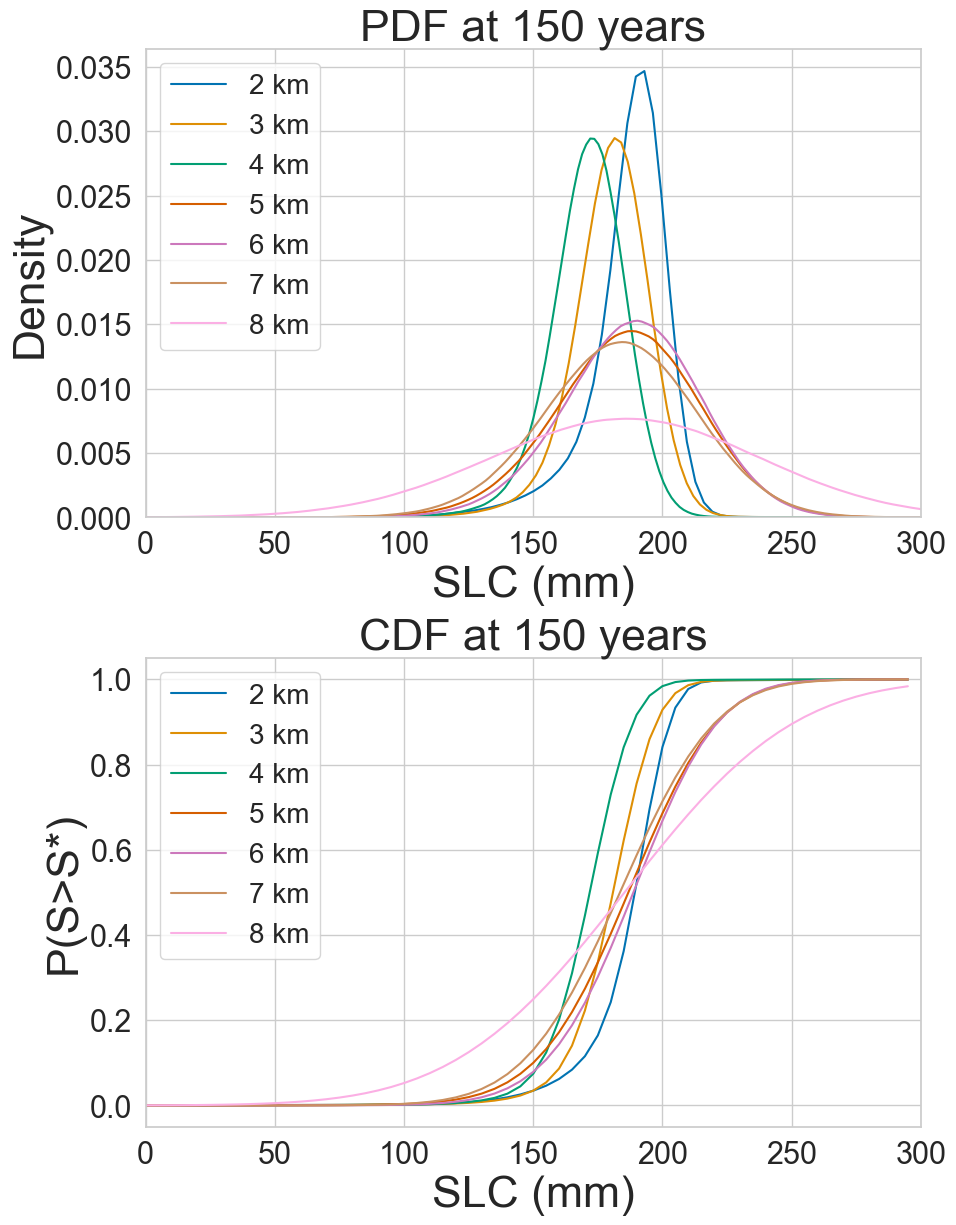

In [8]:
# Plot in a different loop
for timestamp, max_val_un, data_for_plot in all_data:
    plt.figure(figsize=(10,14))
    for r, data_list, x, y in data_for_plot:
        plt.subplot(2,1,1)
        sns.kdeplot(np.array(data_list), label=str(r) + " km", gridsize=400)

        plt.subplot(2,1,2)
        plt.plot(x, [1 - i for i in y], label=str(r) + " km")

    ticksize = 22
    label = 32
    legend = 20

    plt.subplot(2,1,1)
    plt.xlim(0, max_val_un)
    plt.xlabel("SLC (mm)", fontsize=label)
    plt.ylabel("Density", fontsize=label)
    plt.xticks(fontsize=ticksize)
    plt.yticks(fontsize=ticksize)
    plt.title(f"PDF at {timestamp} years", fontsize=label)
    plt.legend(fontsize=legend, loc='upper left')
    plt.subplots_adjust(hspace=0.3)  # Add whitespace between the plots

    plt.subplot(2,1,2)
    plt.xlim(0, max_val_un)
    plt.xlabel("SLC (mm)", fontsize=label)
    plt.ylabel("P(S>S*)", fontsize=label)
    plt.xticks(fontsize=ticksize)
    plt.yticks(fontsize=ticksize)
    plt.legend(fontsize=legend, loc='upper left')
    plt.title(f"CDF at {timestamp} years", fontsize=label)
    plt.savefig(f"./../assets/plots/fig_4/high_mean_cdf_pdf_{timestamp}.pdf", bbox_inches='tight')


In [5]:
sample_size=10000

In [7]:
# Figure 4: this can take > 10 minute to run
timestamp_list = [100,125,150]
max_val_list= [150,200,300,400]
all_data = []

# Run the stuff and store the data
for timestamp, max_val_un in zip(timestamp_list, max_val_list):
    predictions = [predict_and_plot_SLC(data, timestamp, max_val_un, i, plot=False, sample_size=sample_size, ) for i in range(2,9)]
    data_for_plot = []
    for r, prediction in zip(range(2,9), predictions):
        mean, var = prediction[1]
        data_list = []
        for m, v in zip(mean, var):
            data_list += list(np.random.normal(m, np.sqrt(v), size=sample_size))
        x = []
        y = []
        for thres in range(0, max_val_un, 5):
            x.append(thres)
            y.append(len([i for i in data_list if i > thres]) / len(data_list))
        data_for_plot.append((r, data_list, x, y))
    all_data.append((timestamp, max_val_un, data_for_plot))

# Plot in a different loop
for timestamp, max_val_un, data_for_plot in all_data:
    plt.figure(figsize=(10,14))
    for r, data_list, x, y in data_for_plot:
        plt.subplot(2,1,1)
        sns.kdeplot(np.array(data_list), label=str(r) + " km")

        plt.subplot(2,1,2)
        plt.plot(x, [1 - i for i in y], label=str(r) + " km")

    ticksize = 22
    label = 32
    legend = 20

    plt.subplot(2,1,1)
    plt.xlim(0, max_val_un)
    plt.xlabel("SLC (mm)", fontsize=label)
    plt.ylabel("Density", fontsize=label)
    plt.xticks(fontsize=ticksize)
    plt.yticks(fontsize=ticksize)
    plt.title(f"PDF at {timestamp} years", fontsize=label)
    plt.legend(fontsize=legend, loc='upper left')
    plt.subplots_adjust(hspace=0.3)  # Add whitespace between the plots

    plt.subplot(2,1,2)
    plt.xlim(0, max_val_un)
    plt.xlabel("SLC (mm)", fontsize=label)
    plt.ylabel("P(S>S*)", fontsize=label)
    plt.xticks(fontsize=ticksize)
    plt.yticks(fontsize=ticksize)
    plt.legend(fontsize=legend, loc='upper left')
    plt.title(f"CDF at {timestamp} years", fontsize=label)
    plt.savefig(f"./../assets/plots/fig_4/cdf_pdf_{timestamp}.pdf", bbox_inches='tight')


In [1]:
print("A")

A
